---
## 0. Disclosure:
Writer: Saekwang Nam (Matrikelnummer: 3893706), Eunji An (Matrikelnummer: 4268110)

---
## 1. EXAMple:

Describe two different forms of *Dataset Shift*.

 - 1. **Covariate shift**: distribution of x changes
 - 2. **Prior shift**: relationship between x and y changes
 
## 2. EXAMple2:

``` python
def unit_test(density_function, x_min, x_max, avg, moment_p):
    # selected_x would be a list of x-values between "x_min" and "x_max",
    # where the relative amount of the value x in the range
    # corresponds to density_function(x). For example,
    selected_x = numpy.random.choice(numpy.arange(x_min, x_max), p=density_function) 
    
    # let's check if the average of the x values is close with the moments of p.
    expected_val = np.average(selected_x)
    
    # compare "expected_val" and "moment_p"
    return assertAlmostEqual(expected_val, moment_p,
                       msg="The expected value must be almost equal to the moments of p")
```

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup 
from scipy import stats
import matplotlib.pyplot as plt
soup = BeautifulSoup()

In [2]:
url = requests.get("https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films", timeout=10).text

In [3]:
soup = BeautifulSoup(url,'lxml')
soup.title.string
#soup.prettify()

'List of Marvel Cinematic Universe films - Wikipedia'

In [4]:
# Get a table of "Critical and public response"
table = soup.findAll('table')[5]
#table = soup.find('table', {"class":'wikitable plainrowheaders sortable'})

# Number of columns in the table
cells = []
for row in table.findAll("tr")[:2]:
    for cell in row.findAll("th"):
#         print("---------")
#         print(cell.text[:-1])
#         print("---------")
        cells.append(cell.text[:-1])
    
    

# print cells
print("=== cells ===")
print(cells)

# get data
all_data = [] # 2D list
Film = []
Rotten = []
Metacritic = []
CinemaScore = []

for row in table.findAll("tr")[3:]:
    # create a new list to include each row
    # example = ['94% (279 reviews)[280]', '79 (38 reviews)[281]', 'A']
    cell_list = []
    for cell in row.findAll("td"):
        cell_list.append(cell.text[:-1]) # remove '\n'
    
    # stack each cell_list into all_data
    if cell_list:
        all_data.append(cell_list)
        
        Rotten.append(cell_list[0].split()[0][:-1])
        Metacritic.append(cell_list[1].split()[0])
        CinemaScore.append(cell_list[2].split()[0])
        
    # make a list of title
    for title in row.findAll("th"):
        substring = 'Phase'
        if substring not in title.text:
            Film.append(title.text[:-1])
        

# print all_data
# print("=== all_data ===")
#print(all_data)

# test
# print(Film)
# print(Rotten)

# Make a DataFrame
d = {'Film': Film, 'Rotten Tomatoes': Rotten, 'Metacritic': Metacritic, 'CinemaScore': CinemaScore}
Rate = pd.DataFrame(data = d)
Rate

=== cells ===
['Film', 'Critical', 'Public', 'Rotten Tomatoes', 'Metacritic', 'CinemaScore[279]']


,Film,Rotten Tomatoes,Metacritic,CinemaScore
0,Iron Man,94,79,A
1,The Incredible Hulk,67,61,A−
2,Iron Man 2,72,57,A
3,Thor,77,57,B+
4,Captain America: The First Avenger,80,66,A−
5,Marvel's The Avengers,92,69,A+
6,Iron Man 3,79,62,A
7,Thor: The Dark World,66,54,A−
8,Captain America: The Winter Soldier,90,70,A
9,Guardians of the Galaxy,91,76,A


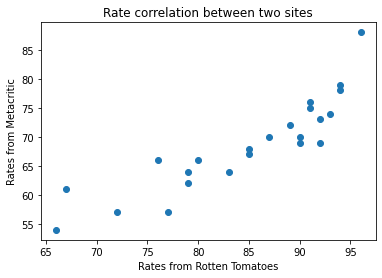

pearson correlation, p-value
(0.8852806505512226, 2.0004989157148047e-08)


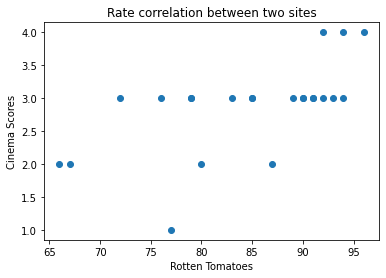

pearson correlation, p-value
(0.6139881878081256, 0.0018303462578472401)


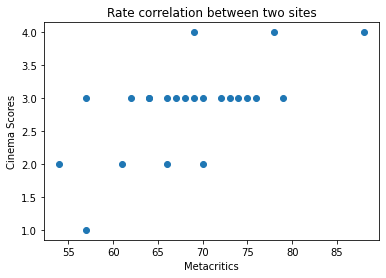

pearson correlation, p-value
(0.6288519266902969, 0.0013082956074492516)


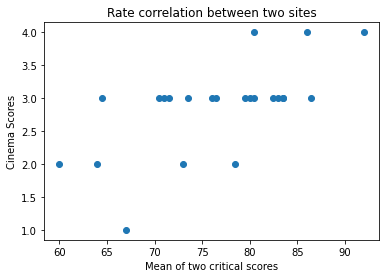

pearson correlation, p-value
(0.6396092230917494, 0.0010150537418733036)


In [30]:
# pearson correlation
# corr = lambda p : pd.to_numeric(p['Rotten Tomatoes']).corr(pd.to_numeric(p['Metacritic']))
# re = corr(Rate)
# print(re)

rotten = pd.to_numeric(Rate['Rotten Tomatoes'])
meta = pd.to_numeric(Rate['Metacritic'])
plt.scatter(rotten,meta) # scatter plot
plt.xlabel('Rates from Rotten Tomatoes')
plt.ylabel('Rates from Metacritic')
plt.title('Rate correlation between two sites')
plt.show()
print('pearson correlation, p-value')
print(stats.pearsonr(rotten,meta)) # corr, p_value

public = []
for x in Rate['CinemaScore']:
    if x == 'A+':
        public.append(4)
    elif x == 'A':
        public.append(3)
    elif x == 'A−':
        public.append(2)
    elif x == 'B+':
        public.append(1)

plt.scatter(rotten,public)
plt.xlabel('Rotten Tomatoes')
plt.ylabel('Cinema Scores')
plt.title('Rate correlation between two sites')
plt.show()
print('pearson correlation, p-value')
print(stats.pearsonr(rotten,public)) # corr, p_value

plt.scatter(meta,public)
plt.xlabel('Metacritics')
plt.ylabel('Cinema Scores')
plt.title('Rate correlation between two sites')
plt.show()
print('pearson correlation, p-value')
print(stats.pearsonr(meta,public)) # corr, p_value

mean_critical = []
for x in range(len(rotten)):
    mean_critical.append((rotten[x]+meta[x])/2)
plt.scatter(mean_critical,public)
plt.xlabel('Mean of two critical scores')
plt.ylabel('Cinema Scores')
plt.title('Rate correlation between two sites')
plt.show()
print('pearson correlation, p-value')
print(stats.pearsonr(mean_critical,public)) # corr, p_value

                 Rotten Tomatoes  Metacritics  Cinema Scores
Rotten Tomatoes         1.000000     0.885281       0.613988
Metacritics             0.885281     1.000000       0.628852
Cinema Scores           0.613988     0.628852       1.000000


Text(0.5, 0, '')

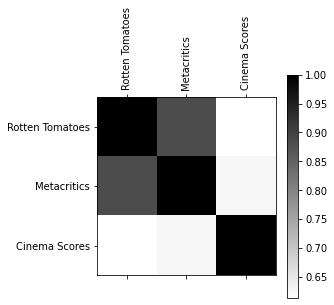

In [44]:
# correlation example
# https://datatofish.com/correlation-matrix-pandas/
import numpy as np
df2 = pd.DataFrame(data = {'Rotten Tomatoes':rotten, 'Metacritics':meta, 'Cinema Scores':public})
corrMatrix = df2.corr()
print(corrMatrix)

plt.matshow(corrMatrix, cmap=plt.cm.gray_r) # imshow
plt.colorbar()
tick_marks = np.arange(len(corrMatrix.columns))
plt.xticks(tick_marks, corrMatrix.columns, rotation=90)
plt.yticks(tick_marks, corrMatrix.index)

plt.ylabel(corrMatrix.index.name)
plt.xlabel(corrMatrix.columns.name)

In [6]:
# Get a table of "Critical and public response"
table_2 = soup.findAll('table')[4]
#table = soup.find('table', {"class":'wikitable plainrowheaders sortable'})

# Number of columns in the table
cells = []
for row in table_2.findAll("tr")[:2]:
    for cell in row.findAll("th"):
#         print("---------")
#         print(cell.text[:-1])
#         print("---------")
        cells.append(cell.text[:-1])
    
    

# print cells
print("=== cells ===")
print(cells)

# get data
Film2 = []
US_release_date = []
US_Canada_gross = []
Other_gross = []
Worldwide_gross = []
US_Canada_ranking = []
Worldwide_ranking = []
Budget = []

for row in table_2.findAll("tr")[3:29]:
    # create a new list to include each row
    # example = ['May 2, 2008', '$319,034,126', '$266,762,121',
    #            '$585,796,247', '74', '170', '$140\xa0million', '[245]']
    cell_list = []
    for cell in row.findAll("td"):
        cell_list.append(cell.text[:-1]) # remove '\n'
    
    # stack each cell_list into all_data
    if cell_list:
        #print(cell_list)
        US_release_date.append(cell_list[0])
        US_Canada_gross.append(cell_list[1][1:])
        Other_gross.append(cell_list[2][1:])
        Worldwide_gross.append(cell_list[3][1:])
        US_Canada_ranking.append(cell_list[4])
        Worldwide_ranking.append(cell_list[5])
        Budget.append(cell_list[6])
        
    # make a list of title
    for title in row.findAll("th"):
        substring = 'Phase'
        if substring not in title.text:
            Film2.append(title.text[:-1])

# test
# print(Film2)
# print("-===")
# print(US_release_date)

# Make a DataFrame
d2 = {'Film': Film, 'US release date': US_release_date,
      'US and Canada box office gross': US_Canada_gross,
      'Other territories box office gross': Other_gross,
      'Worldwide box office gross': Worldwide_gross,
      'US and Canada ranking': US_Canada_ranking,
      'Worldwide ranking': Worldwide_ranking,
      'Budget': Budget}
Performance = pd.DataFrame(data = d2)
Performance

=== cells ===
['Film', 'U.S. release date', 'Box office gross', 'All-time ranking', 'Budget', 'Ref(s)', 'U.S. and Canada', 'Other territories', 'Worldwide', 'U.S. and Canada', 'Worldwide']


,Film,US release date,US and Canada box office gross,Other territories box office gross,Worldwide box office gross,US and Canada ranking,Worldwide ranking,Budget
0,Iron Man,"May 2, 2008","319,034,126","266,762,121","585,796,247",74,170,$140 million
1,The Incredible Hulk,"June 13, 2008","134,806,913","129,964,083","264,770,996",454,573,$150 million
2,Iron Man 2,"May 7, 2010","312,433,331","311,500,000","623,933,331",80,151,$200 million
3,Thor,"May 6, 2011","181,030,624","268,295,994","449,326,618",257,256,$150 million
4,Captain America: The First Avenger,"July 22, 2011","176,654,505","193,915,269","370,569,774",273,348,$140 million
5,Marvel's The Avengers,"May 4, 2012","623,357,910","895,457,605","1,518,815,515",8,8,$220 million
6,Iron Man 3,"May 3, 2013","409,013,994","805,797,258","1,214,811,252",32,20,$178.4 million
7,Thor: The Dark World,"November 8, 2013","206,362,140","438,421,000","644,783,140",204,142,$152.7 million
8,Captain America: The Winter Soldier,"April 4, 2014","259,766,572","454,654,931","714,421,503",119,117,$177 million
9,Guardians of the Galaxy,"August 1, 2014","333,176,600","439,601,585","772,778,185",66,100,$195.9 million


In [8]:
# # correlation example
# # https://datatofish.com/correlation-matrix-pandas/
# US_rank = Performance['US and Canada ranking'].astype(int)
# Wo_rank = Performance['Worldwide ranking'].astype(int)

# df2 = pd.DataFrame(data = {'US rank':US_rank, 'Wo rank':Wo_rank})
# corrMatrix = df2.corr()
# print(corrMatrix)

          US rank   Wo rank
US rank  1.000000  0.950018
Wo rank  0.950018  1.000000


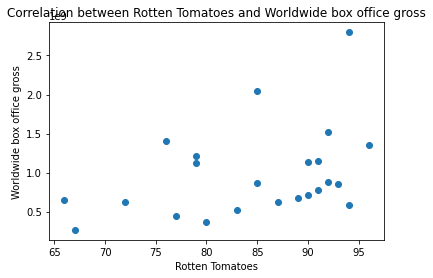

pearson correlation, p-value
(0.38007358510963546, 0.07362364305078087)


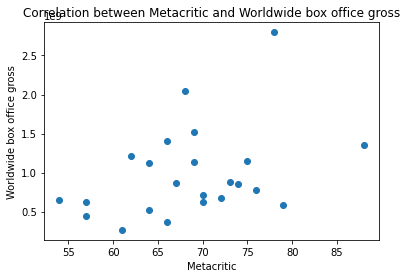

pearson correlation, p-value
(0.373441316928487, 0.07922074921999324)


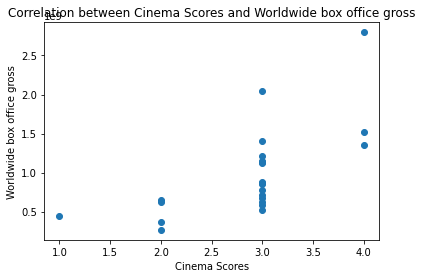

pearson correlation, p-value
(0.6590114315383353, 0.0006265309976071556)


In [41]:
# worldwide_gross = pd.to_numeric(Performance['Worldwide box office gross'])
worldwide_gross = []
for x in Performance['Worldwide box office gross']:
    worldwide_gross.append(int(x.replace(',','')))
    
plt.scatter(rotten,worldwide_gross)
plt.xlabel('Rotten Tomatoes')
plt.ylabel('Worldwide box office gross')
plt.title('Correlation between Rotten Tomatoes and Worldwide box office gross')
plt.show()
print('pearson correlation, p-value')
print(stats.pearsonr(rotten,worldwide_gross)) # corr, p_value

plt.scatter(meta,worldwide_gross)
plt.xlabel('Metacritic')
plt.ylabel('Worldwide box office gross')
plt.title('Correlation between Metacritic and Worldwide box office gross')
plt.show()
print('pearson correlation, p-value')
print(stats.pearsonr(meta,worldwide_gross)) # corr, p_value

plt.scatter(public,worldwide_gross)
plt.xlabel('Cinema Scores')
plt.ylabel('Worldwide box office gross')
plt.title('Correlation between Cinema Scores and Worldwide box office gross')
plt.show()
print('pearson correlation, p-value')
print(stats.pearsonr(public,worldwide_gross)) # corr, p_value

                            Rotten Tomatoes  Metacritics  Cinema Scores  \
Rotten Tomatoes                    1.000000     0.885281       0.613988   
Metacritics                        0.885281     1.000000       0.628852   
Cinema Scores                      0.613988     0.628852       1.000000   
Worldwide box office gross         0.380074     0.373441       0.659011   

                            Worldwide box office gross  
Rotten Tomatoes                               0.380074  
Metacritics                                   0.373441  
Cinema Scores                                 0.659011  
Worldwide box office gross                    1.000000  


Text(0.5, 0, '')

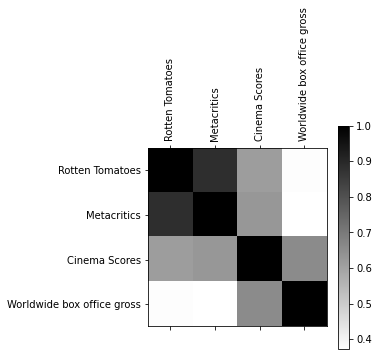

In [43]:
# correlation example
# https://datatofish.com/correlation-matrix-pandas/
import numpy as np
df3 = pd.DataFrame(data = {'Rotten Tomatoes':rotten, 'Metacritics':meta, 'Cinema Scores':public, 'Worldwide box office gross':worldwide_gross})
corrMatrix2 = df3.corr()
print(corrMatrix2)

plt.matshow(corrMatrix2, cmap=plt.cm.gray_r) # imshow
plt.colorbar()
tick_marks = np.arange(len(corrMatrix2.columns))
plt.xticks(tick_marks, corrMatrix2.columns, rotation=90)
plt.yticks(tick_marks, corrMatrix2.index)

plt.ylabel(corrMatrix2.index.name)
plt.xlabel(corrMatrix2.columns.name)

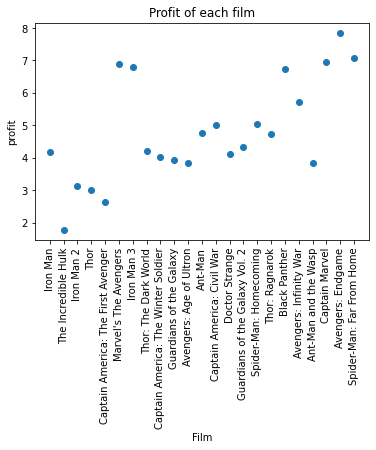

In [29]:
profit = []
budget = []
for x in Performance['Budget']:
    x_str = x.split()[0][1:]
    
    if(len(x_str)> 5):
        if(x_str[3] == '–'): # in case x_str = $316–400 million, take the average of the two numbers
            first = float(x_str[0:3])
            second = float(x_str[4:])
            x_num = ((first + second)/2)*1000000
    else:
        x_num = float(x_str)*1000000
    budget.append(x_num)
    

# b = ['140,000,000', '150,000,000', '200,000,000', '150,000,000', '140,000,000', '220,000,000', '178,400,000', '152,700,000', '177,000,000', '195,900,000', '365,500,000', '109,300,000', '230,000,000', '165,000,000', '200,000,000', '175,000,000', '180,000,000', '200,000,000', '358,000,000', '162,000,000', '162,500,000', '356,000,000', '160,000,000']
for x in range(len(worldwide_gross)):
#     profit.append(worldwide_gross[x]/int(b[x].replace(',','')))
    profit.append(worldwide_gross[x]/budget[x])
# print(profit) 

# plt.scatter(Performance['Film'],b)
plt.scatter(Performance['Film'],profit)
plt.xlabel('Film')
plt.xticks(Performance['Film'], rotation='vertical')
plt.ylabel('profit')
plt.title('Profit of each film')
plt.show()

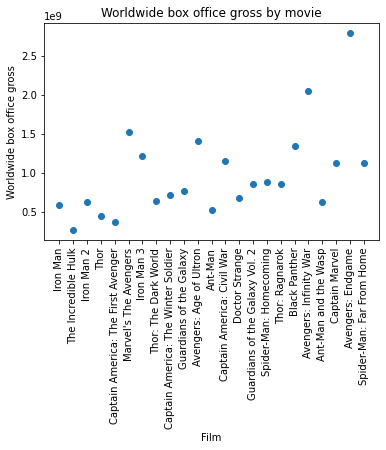

In [48]:
plt.scatter(Performance['Film'],worldwide_gross)
plt.xlabel('Film')
plt.xticks(Performance['Film'], rotation='vertical')
plt.ylabel('Worldwide box office gross')
plt.title('Worldwide box office gross by movie')
plt.show()

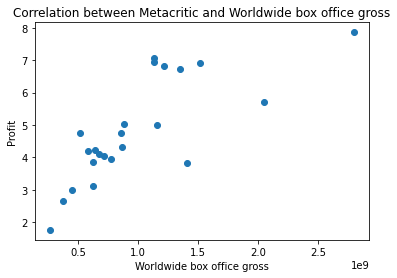

pearson correlation, p-value
(0.7661053293223986, 2.029042908258859e-05)


In [47]:
plt.scatter(worldwide_gross, profit)
plt.ylabel('Profit')
plt.xlabel('Worldwide box office gross')
plt.title('Correlation between Metacritic and Worldwide box office gross')
plt.show()
print('pearson correlation, p-value')
print(stats.pearsonr(profit,worldwide_gross)) # corr, p_value